In [1]:
import pandas as pd
import numpy as np
import math
import statistics
import matplotlib.pyplot as plt
import sklearn

from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GroupKFold, KFold, cross_val_predict, train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
spectra = pd.read_excel('pi_cup.xlsx')

spectra.drop(columns=['Unnamed: 0'], inplace=True)

spectra

,Ch_0_0,Ch_0_1,Ch_0_2,Ch_0_3,Ch_0_4,Ch_0_5,Ch_0_6,Ch_0_7,Ch_0_8,Ch_0_9,...,Hyaline cylinders_a,Bacteria_a,Crystals_a,Ferment_a,Small cells_a,Pathological cylinders_a,Slime_a,Spermatozoon_a,TOTAL_a,TOTAL
0,116.2066,86.67870,501.8073,1966.517,1211.834,3746.119,420.2404,1028.663,1396.969,233.9503,...,1,1,0,0,0,1,0,0,8,1
1,110.4915,89.53624,495.1797,2054.570,1219.735,3993.029,410.4901,1043.288,1414.642,244.8904,...,1,1,0,0,0,1,0,0,8,1
2,103.8239,81.91614,484.7648,1963.676,1213.810,3925.869,400.7397,1040.363,1449.987,248.2566,...,1,1,0,0,0,1,0,0,8,1
3,109.5390,85.72619,510.3286,2041.314,1270.105,4032.534,412.4402,1055.964,1477.758,249.0982,...,1,1,0,0,0,1,0,0,8,1
4,105.7290,82.86865,488.5520,1967.463,1214.797,3926.857,408.5400,1042.313,1459.244,248.2566,...,1,1,0,0,0,1,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4227,131.4468,110.49150,632.4666,2789.291,1586.150,5790.534,458.2668,1126.166,1433.998,253.3059,...,0,1,0,0,1,0,0,0,5,1
4228,131.4468,110.49150,633.4134,2793.078,1586.150,5820.163,459.2419,1123.241,1433.998,251.6228,...,0,1,0,0,1,0,0,0,5,1
4229,131.4468,109.53900,634.3602,2764.674,1585.162,5782.632,459.2419,1124.216,1432.315,252.4644,...,0,1,0,0,1,0,0,0,5,1
4230,132.3993,109.53900,636.2538,2770.355,1588.125,5762.879,460.2169,1123.241,1437.364,252.4644,...,0,1,0,0,1,0,0,0,5,1


In [3]:
X=spectra.iloc[:,0:36]
X['Dataset'] = spectra['Dataset']
X

,Ch_0_0,Ch_0_1,Ch_0_2,Ch_0_3,Ch_0_4,Ch_0_5,Ch_0_6,Ch_0_7,Ch_0_8,Ch_0_9,...,Ch_1_9,Ch_1_10,Ch_1_11,Ch_1_12,Ch_1_13,Ch_1_14,Ch_1_15,Ch_1_16,Ch_1_17,Dataset
0,116.2066,86.67870,501.8073,1966.517,1211.834,3746.119,420.2404,1028.663,1396.969,233.9503,...,660.4495,738.9610,748.5693,419.7867,606.7318,113.9607,206.4316,103.15650,146.9493,Chm1
1,110.4915,89.53624,495.1797,2054.570,1219.735,3993.029,410.4901,1043.288,1414.642,244.8904,...,638.8227,729.3528,700.5281,408.5924,614.5677,118.5191,212.2925,106.07600,155.7079,Chm1
2,103.8239,81.91614,484.7648,1963.676,1213.810,3925.869,400.7397,1040.363,1449.987,248.2566,...,661.2813,748.5693,736.3406,400.7564,640.3147,118.5191,227.2702,107.04920,140.1371,Chm1
3,109.5390,85.72619,510.3286,2041.314,1270.105,4032.534,412.4402,1055.964,1477.758,249.0982,...,657.1223,756.4305,726.7324,415.3090,632.4786,121.1239,224.6654,108.02230,163.4933,Chm1
4,105.7290,82.86865,488.5520,1967.463,1214.797,3926.857,408.5400,1042.313,1459.244,248.2566,...,671.2629,765.1653,750.3162,408.5924,574.2682,119.1703,233.7822,107.04920,142.0834,Chm1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4227,131.4468,110.49150,632.4666,2789.291,1586.150,5790.534,458.2668,1126.166,1433.998,253.3059,...,586.4193,696.1607,647.2460,413.0701,589.9402,114.6119,197.9660,99.26377,140.1371,Chm500
4228,131.4468,110.49150,633.4134,2793.078,1586.150,5820.163,459.2419,1123.241,1433.998,251.6228,...,578.9330,693.5402,660.3481,411.9507,548.5213,114.6119,216.1997,99.26377,130.4053,Chm500
4229,131.4468,109.53900,634.3602,2764.674,1585.162,5782.632,459.2419,1124.216,1432.315,252.4644,...,591.4100,694.4138,654.2338,411.9507,608.9706,113.9607,203.1756,99.26377,124.5663,Chm500
4230,132.3993,109.53900,636.2538,2770.355,1588.125,5762.879,460.2169,1123.241,1437.364,252.4644,...,592.2418,693.5402,683.9320,413.0701,569.7905,113.9607,193.4076,99.26377,136.2444,Chm500


__Комментарий__ 
> На будущее пожалуйста на делай так, как в блоке выше : совершенно непонятно какие ты аномалии ты выбрал, либо оставляй комментарии, либо сразу делай слайсы не с числовыми индексами а названиями

In [4]:
# 1-ая категория
y1 = spectra.loc[:, ['Density_a', 'pH_a']]
y1['Dataset'] = spectra['Dataset']

# 2-ая категория
y2 = spectra.loc[:, ['Protein_a', 'Bilirubin_a',
                     'Glucose_a', 'Ketones_a',
                     'Nitrite_a', 'Urobilinogen_a']]
y2['Dataset'] = spectra['Dataset']

# 3-ья категория
y3 = spectra.loc[:, ['Leukocyte_a', 'Blood_a', 'Erythrocyte_a',
                     'Leukocyte_a.1','Squamous cells_a',
                     'Hyaline cylinders_a', 'Bacteria_a',
                     'Crystals_a','Ferment_a', 'Small cells_a',
                     'Pathological cylinders_a', 'Slime_a', 'Spermatozoon_a']]
y3['Dataset'] = spectra['Dataset']

In [5]:
def sigmoid(x):
    return 1/(1 + np.exp(10*(-x + 0.5)))

__Комментарий__ 

> Оказалось метрики косячные, исправил на библиотечные, вроде стало адекватнее, но не лучше

Для установки "pip install -U imbalanced-learn"

In [6]:
from imblearn.metrics import sensitivity_score, specificity_score

def medical_metrics(y_test, y_pred):
    # sensitivity =  (y_pred * y_test).sum() / y_test.sum()
    # specificity = ((1 - y_pred)*(1-y_test)).sum() / (1 - y_test).sum()
    sensitivity = sensitivity_score(y_test, y_pred)
    specificity = specificity_score(y_test, y_pred)
    return sensitivity, specificity

In [7]:
def pls_func(X_train, X_test, y_train, y_test, n_comp, condition = 0.5):
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X_train,y_train)
    pls_result = pls.predict(X_test)
    pls_result_train = pls.predict(X_train)
    pls_sigmoid = sigmoid(pls_result)
    pls_sigmoid_train = sigmoid(pls_result_train)
    binary_prediction = (pls_sigmoid > condition).astype('uint8')
    binary_prediction_train = (pls_sigmoid_train > condition).astype('uint8')
    y_pred = pd.DataFrame(binary_prediction)
    y_pred.columns = list(y_test)
    y_pred_train = pd.DataFrame(binary_prediction_train)
    y_pred_train.columns = list(y_train)

    return y_pred, y_pred_train

In [8]:
def calculate_metrics(y_test, y_pred, iteration, n_comp, Anomaly, condition):
    metrics_list = []
    metrics_list.append(['iteration','n_comp','Anomaly','condition','sens','spec'])
    true = y_test[Anomaly]
    pred = y_pred[Anomaly]
    sens, spec = medical_metrics(true, pred)
    metrics_list.append([iteration,n_comp,Anomaly,condition,sens,spec])
    metrics_data = pd.DataFrame(metrics_list)
    new_header = metrics_data.iloc[0]
    metrics_data = metrics_data[1:]
    metrics_data.columns = new_header

    return metrics_data

In [9]:
def split_data(X, y, Anomaly):
    groups = X.drop_duplicates('Dataset').Dataset.values
    labels = y.drop_duplicates('Dataset')
    train_g, test_g, _,_ = train_test_split(groups, labels, stratify = labels[Anomaly], test_size = 0.2)
    train_index = X[X.Dataset.isin(train_g)].index
    test_index = X[X.Dataset.isin(test_g)].index
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    X_train.drop(columns = 'Dataset', inplace = True)
    X_test.drop(columns = 'Dataset', inplace = True)
    y_train.drop(columns = 'Dataset', inplace = True)
    y_test.drop(columns = 'Dataset', inplace = True)

    return X_train, X_test, y_train, y_test

In [10]:
def cross_val(X, y, n_comp, N_splits=5, condition = 0.5):
    anomaly_list = list(y)
    anomaly_list.pop()
    metrics_data = pd.DataFrame()
    metrics_data_train = pd.DataFrame()
    for i in range(len(anomaly_list)):
        for iteration in range(N_splits):
            X_train, X_test, y_train, y_test = split_data(X, y, anomaly_list[i])
            y_pred, y_pred_train = pls_func(X_train, X_test, y_train, y_test, n_comp, condition)
            to_concat = calculate_metrics(y_test, y_pred, iteration, n_comp, anomaly_list[i], condition)
            metrics_data = pd.concat([metrics_data,to_concat])
            metrics_data = metrics_data.reset_index(drop = True)
            to_concat_train = calculate_metrics(y_train, y_pred_train, iteration, n_comp, anomaly_list[i], condition)
            metrics_data_train = pd.concat([metrics_data_train,to_concat])
            metrics_data_train = metrics_data_train.reset_index(drop = True)

    return metrics_data, metrics_data_train

In [11]:
def by_anomaly_mean(metrics_data):
    metrics_data_mean = pd.DataFrame()
    anomaly_list = metrics_data.drop_duplicates('Anomaly').Anomaly
    anomaly_list = anomaly_list.reset_index()
    anomaly_list = anomaly_list.Anomaly
    for i in range(len(anomaly_list)):
        to_concat = pd.DataFrame(metrics_data.loc[metrics_data['Anomaly']==anomaly_list[i]].mean()).T
        to_concat['Anomaly'] = anomaly_list[i]
        to_concat['sens_variance'] = statistics.variance(metrics_data.loc[metrics_data['Anomaly']==anomaly_list[i]].sens)
        to_concat['spec_variance'] = statistics.variance(metrics_data.loc[metrics_data['Anomaly']==anomaly_list[i]].spec)
        to_concat.drop(columns = 'iteration', inplace = True)
        metrics_data_mean = pd.concat([metrics_data_mean, to_concat])

    return metrics_data_mean

In [19]:
from tqdm._tqdm_notebook import tqdm, tqdm_notebook

def get_components_data(X, y, n_min, n_max, N_splits = 5, condiition = 0.5):
    result = pd.DataFrame()
    result_train = pd.DataFrame()
    for i in tqdm(range(n_max-n_min)):
        metrics_data, metrics_data_train = cross_val(X, y, n_min+i, N_splits)
        metrics_data_mean = by_anomaly_mean(metrics_data)
        metrics_data_mean_train = by_anomaly_mean(metrics_data_train)
        result = pd.concat([result, metrics_data_mean])
        result = result.reset_index(drop = True)
        result_train = pd.concat([result_train, metrics_data_mean_train])
        result_train = result_train.reset_index(drop = True)

    return result, result_train

In [20]:
def plot_dependence(result):
    anomaly_list = result.drop_duplicates('Anomaly').Anomaly
    for i in range(len(anomaly_list)):
        x1 = result.loc[result['Anomaly']==anomaly_list[i]].n_comp
        y1 = result.loc[result['Anomaly']==anomaly_list[i]].sens
        y1err = result.loc[result['Anomaly']==anomaly_list[i]].sens_variance
        plt.plot(x1, y1, color = 'blue', label='Чувствительность')
        plt.errorbar(x1,y1,yerr=y1err)
        x2 = result.loc[result['Anomaly']==anomaly_list[i]].n_comp
        y2 = result.loc[result['Anomaly']==anomaly_list[i]].spec
        y2err = result.loc[result['Anomaly']==anomaly_list[i]].spec_variance
        plt.plot(x2, y2, color = 'orange', label='Специфичность')
        plt.errorbar(x2,y2,yerr=y2err)

        plt.xlabel('Число компонент')
        plt.ylabel('Чувствительность, Специфичность')
        plt.title('%s'% (anomaly_list[i]))
        plt.legend()
        plt.show() 

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
result1, result_train1 = get_components_data(X, y1, 2, 32, 5)
result2, result_train2 = get_components_data(X, y2, 2, 32, 5)
result3, result_train3 = get_components_data(X, y3, 2, 32, 5)

Зависимость Чувствительности и Специфичности на тестовой выборке для 1 категории аномалий


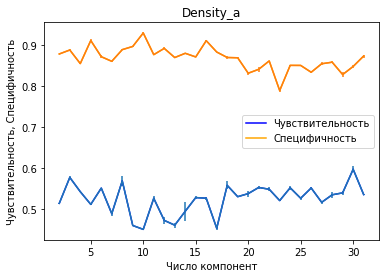

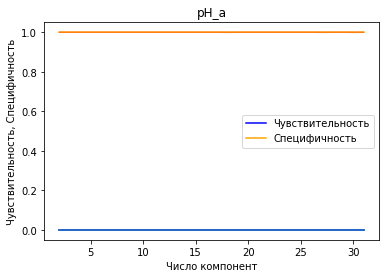

Зависимость Чувствительности и Специфичности на обучающей выборке для 1 категории аномалий


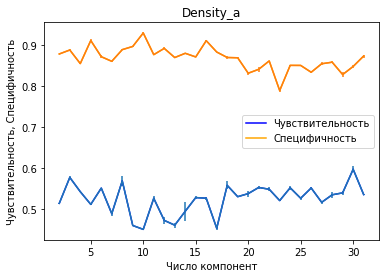

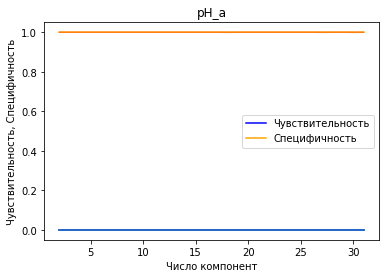

In [23]:
print('Зависимость Чувствительности и Специфичности на тестовой выборке для 1 категории аномалий')
plot_dependence(result1)
print('Зависимость Чувствительности и Специфичности на обучающей выборке для 1 категории аномалий')
plot_dependence(result_train1)

Зависимость Чувствительности и Специфичности на тестовой выборке для 2 категории аномалий


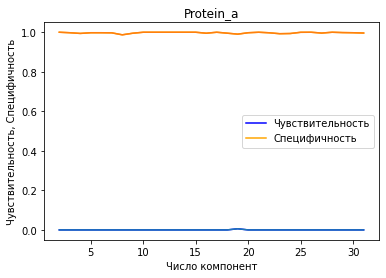

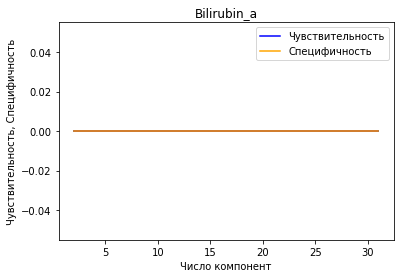

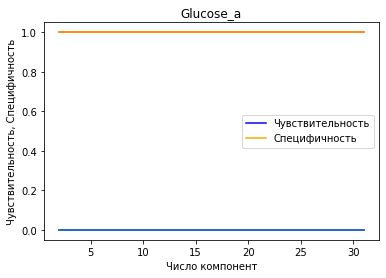

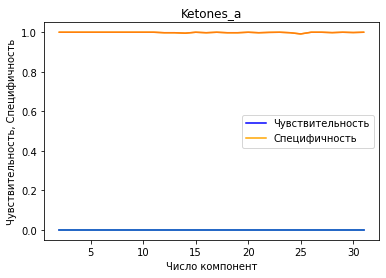

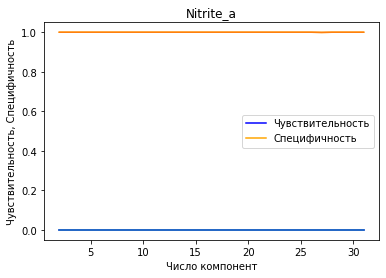

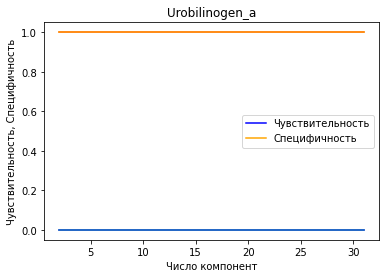

Зависимость Чувствительности и Специфичности на обучающей выборке для 2 категории аномалий


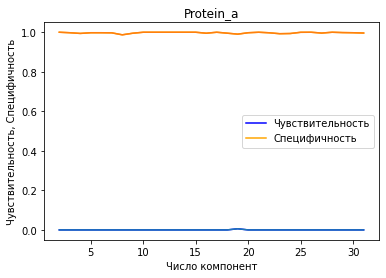

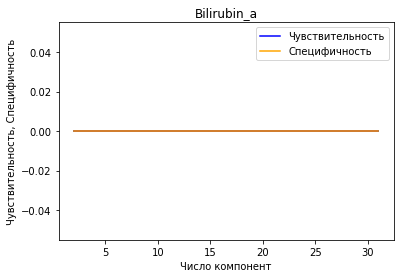

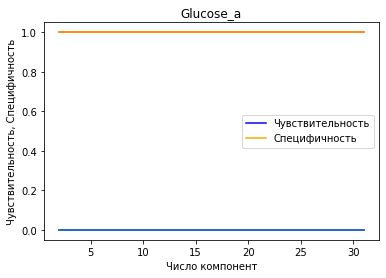

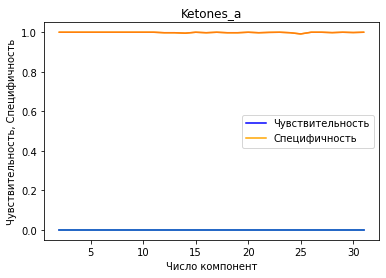

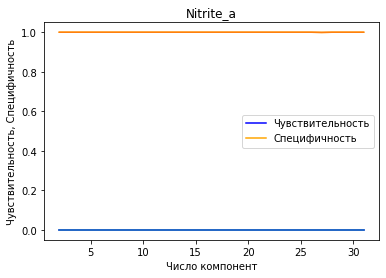

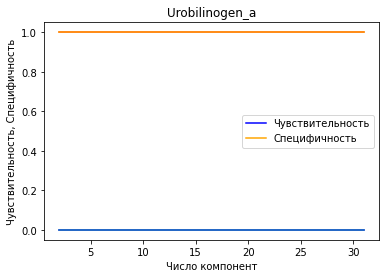

In [24]:
print('Зависимость Чувствительности и Специфичности на тестовой выборке для 2 категории аномалий')
plot_dependence(result2)
print('Зависимость Чувствительности и Специфичности на обучающей выборке для 2 категории аномалий')
plot_dependence(result_train2)

Зависимость Чувствительности и Специфичности на тестовой выборке для 3 категории аномалий


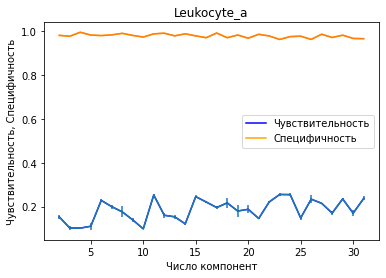

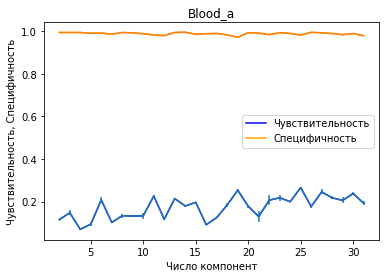

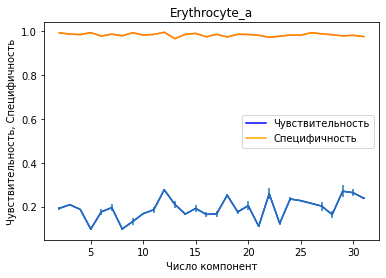

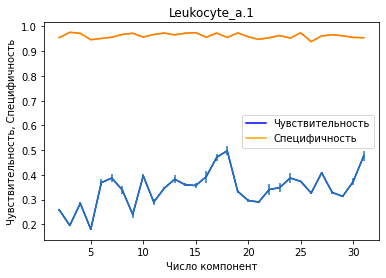

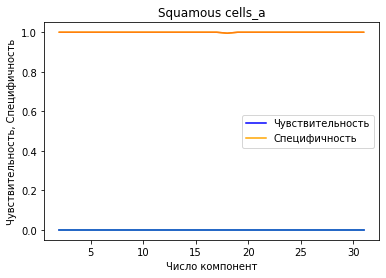

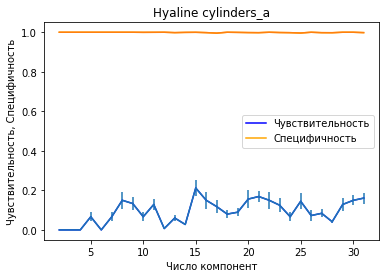

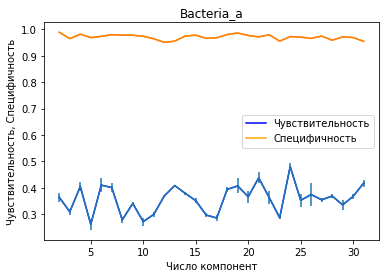

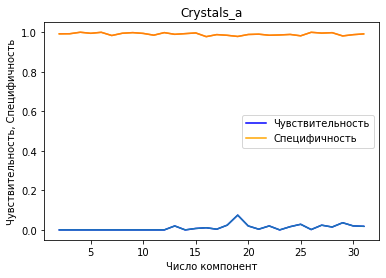

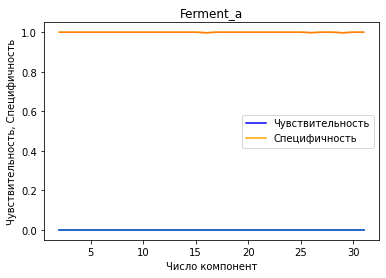

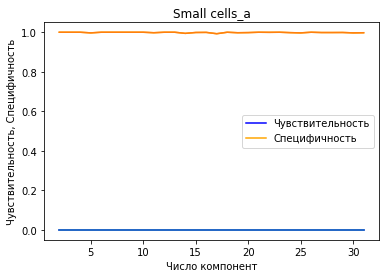

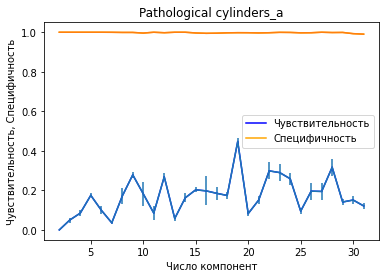

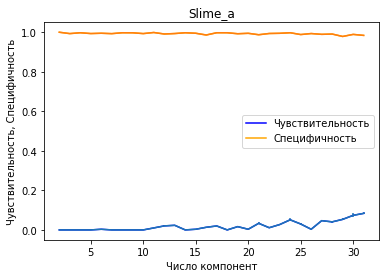

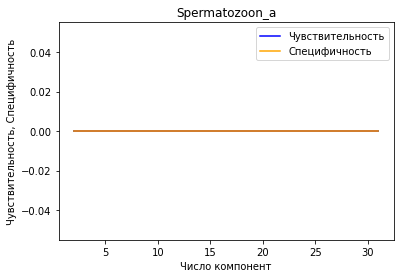

Зависимость Чувствительности и Специфичности на обучающей выборке для 3 категории аномалий


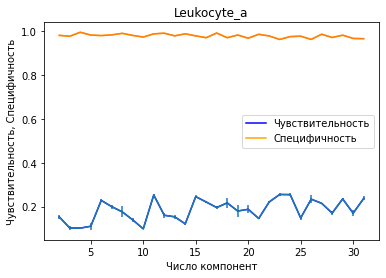

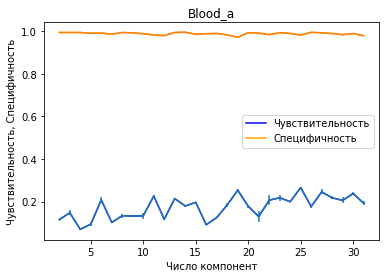

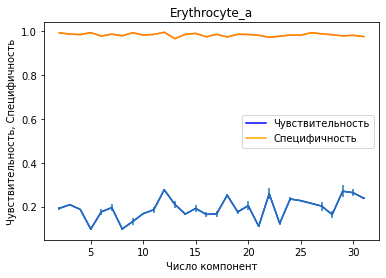

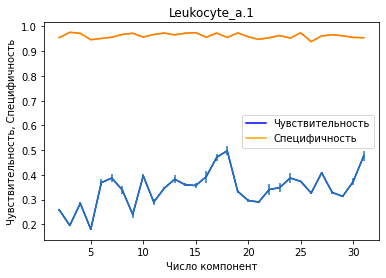

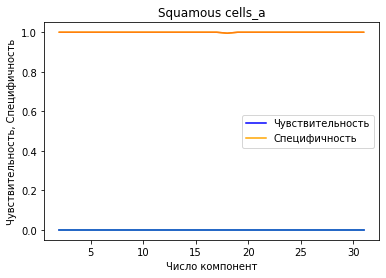

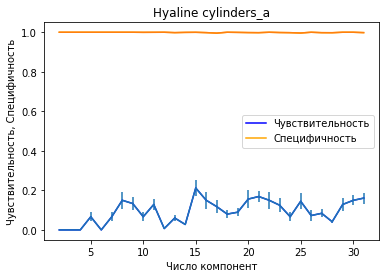

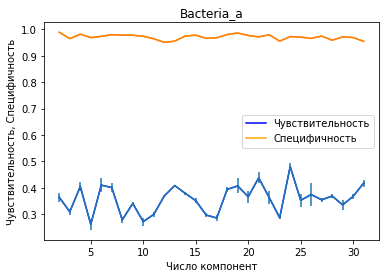

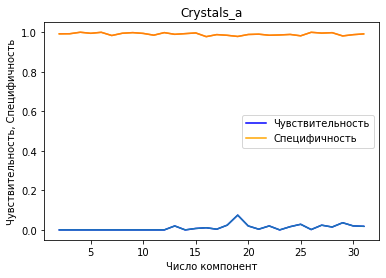

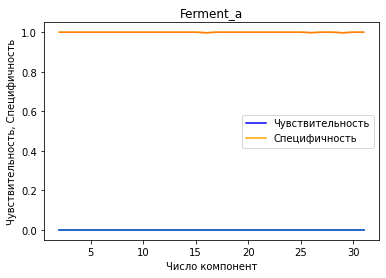

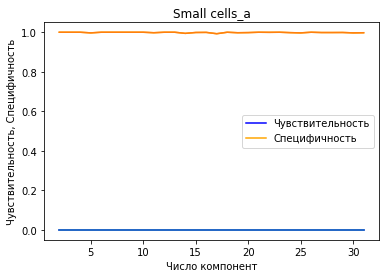

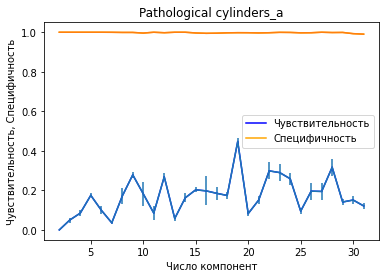

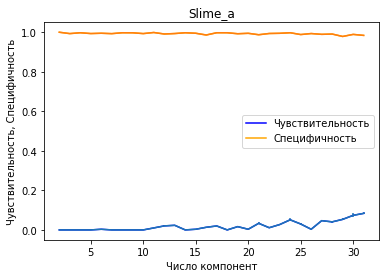

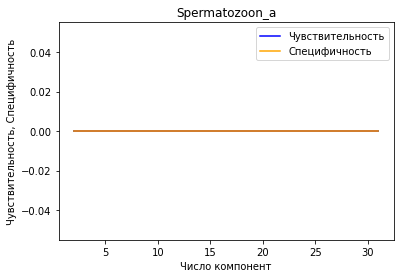

In [25]:
print('Зависимость Чувствительности и Специфичности на тестовой выборке для 3 категории аномалий')
plot_dependence(result3)
print('Зависимость Чувствительности и Специфичности на обучающей выборке для 3 категории аномалий')
plot_dependence(result_train3)

__Комментарий__

> Сделай подбор порога предсказания, и тогда метрики станут лучше